## The Black-Scholes Model
**<u>Assumptions:</u>**
* We assume that there is a stock whose price follows **Geometric Brownian motion** i.e. it satisfies the SDE
$$ d S_t = S_t( \mu \, dt + \sigma \, dW_t) $$
for some constants $\mu$ and $\sigma$ and a Brownian motion $W_t$.
* Assume that you are able to buy and sell stock in arbitrary quantities at the price $S_t$. Also we can borrow    fraction of a stock.
* Assume that you can buy and sell stock in continuous time. 
* Assume that any money you may have, or any money that you owe, grows at a risk-free interest rate of $r$ (continuously compounded).
* Assume that short term interest rates **r** are constant.
* Assume that stocks do not pay any dividends.
* Assume no transaction costs.
* Assume short selling is allowed.
* The risk-free rate and volatility of the underlying asset are known and constant and the returns of the underlying asset are normally distributed.

### The Black-Scholes formula

The **Black-Scholes price** of a `European call option` with strike $K$ and maturity $T$ in the market described above
is given by the formulae:
$$ V(S_t,t,K,T,r,\sigma):=S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$
where
$$
d_1 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r + \tfrac{1}{2}\sigma^2) (T-t)\right) 
$$
$$
d_2 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r - \tfrac{1}{2}\sigma^2) (T-t)\right) := d_1 - \sigma \sqrt{T-t}
$$
and $N(.)$ is the cumulative distribution function of the standard normal distribution.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def blackscholes(r, S, K, T, sigma, t=0, type="call"):
    '''
    Calculates the Black-Scholes price of a European call/put option with strike K and maturity T.
    
            Parameters:
                    r (double) : Risk-free Interest Rate.
                    S (double) : Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    T (double) : Time to expiration (in years).
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    try:
        if type == "call":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*(T-t))*norm.cdf(d2, 0, 1)
        elif type == "put":
            price = K*np.exp(-r*(T-t))*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'call' for Call or 'put' for Put.")

In [47]:
r = 0.043
S = 141.38
K = 150
T = 230/365
sigma = 0.24
call_price = blackscholes(r, S, K, T, sigma, type="call")
put_price = blackscholes(r, S, K, T, sigma, type="put")
print(f'Option price is: {blackscholes(r, S, K, T, sigma, type="call"):.2f}')
print(f'Option price is: {blackscholes(r, S, K, T, sigma, type="put"):.2f}')

Option price is: 8.75
Option price is: 13.36


Premium of an Option is composed of `Intrinsic Value` and `Time Value`. Intrinsic value measures the immediate value an option would have if it were exercised immediately.
Time Value of the premium is composed of factors such as time to expiration, implied volatility, and the potential for the option to gain intrinsic value in the future. Time value decreases as the option approaches expiration, as there is less time for the option to move in a favorable direction. In-the-money options typically have higher premiums due to their intrinsic value, while out-of-the-money options derive their premium primarily from time value. Call Options intrinsic value is $(S-K)^+$ and Put Options intrinsic value is $(K-S)^+$.
$$\boxed{\text{Premium} = \text{Intrinsic Value} + \text{Time Value}}$$

In [56]:
# Lets calculate Time Value of above Put Option.
intrinsic_value = np.maximum(K - S,0)
time_value = put_price - intrinsic_value
print(f'Time value of Put Option is : {time_value:.2f}')

Time value of Put Option is : 4.74


### Payoff Diagram
Lets plot the buyers Payoff Diagram for Call and Put Options.

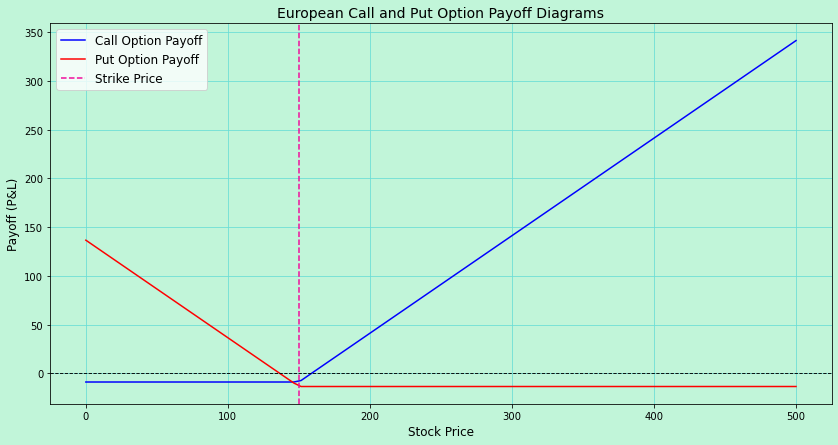

In [57]:
def call_payoff(S, K):
    return np.maximum(S - K,0)

def put_payoff(S, K):
    return np.maximum(K - S,0)

StockPrices = np.linspace(0, 500, 100)  # Range of 100 underlying asset prices from 50-500.

# Calculate Payoffs.
call_payoffs = call_payoff(StockPrices, K)- call_price  # Array conatining 100 payoffs of Call Option for various S.
put_payoffs = put_payoff(StockPrices, K)- put_price

# Plotting the Payoff diagram for Call And Put Option.
plt.figure(figsize=(14, 7), facecolor='#c1f5d9')
plt.plot(StockPrices, call_payoffs, label='Call Option Payoff', color='blue')
plt.plot(StockPrices, put_payoffs, label='Put Option Payoff', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.9)  # Adding x-axis.
plt.axvline(K, linestyle='--', color='#f00c9c', label='Strike Price')  # Adding vertical line at Strike Price.
plt.xlabel('Stock Price', fontsize = 12)
plt.ylabel('Payoff (P&L)',fontsize = 12)
plt.title('European Call and Put Option Payoff Diagrams', fontsize = 14)
plt.legend(fontsize='large')
plt.grid(True, color='#6aded6')
plt.gca().set_facecolor('#c1f5d9')  # Set background colour behind the grid.
plt.show()